In [1]:
#-----------------------------------------------------------------------------------------
# This code is used for Fine Tuning Parameters for Gradient Boosting Classifer Algorithm
#------------------------------------------------------------------------------------------

# Load Required Libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

import seaborn as sns   # Heatmap plot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Algorithm Models to import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# All performance Metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

C:\Users\bchandrasekaran\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Plotting Sub-function to display Training and Testing Set Accuracy

def Plot_Precision_Recall_Curve(precision, recall,averagePrecision):
    plt.clf()
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          averagePrecision))
    plt.show()

def plot_TrainTestAccuracy(xs, train_accuracy_list, dev_accuracy_list):
    plt.clf()
    plt.plot(xs, train_accuracy_list, label='train')
    plt.plot(xs, dev_accuracy_list, label='dev')
    plt.xlabel('Tuning Parameter')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_PrecisionRecall(xs, dev_precision_list, dev_recall_list):
    plt.clf()
    plt.plot(xs, dev_precision_list, label='Precision')
    plt.plot(xs, dev_recall_list, label='recall')
    plt.ylabel('Precision and Recall')
    plt.xlabel(' Tuning Parameter')
    plt.legend()
    plt.show() 

def plot_AUCROCCurve(fpr,tpr,AUC):
    plt.clf()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic' + str(AUC))
    plt.legend(loc="lower right")
    plt.show()    

def plot_kscurve(fpr,tpr):    
    plt.clf()    
    plt.plot([0,1,2,3,4,5,6,7,8,9,10],np.percentile(tpr,[0,10,20,30,40,50,60,70,80,90,100]),color = 'r')
    plt.plot([0,1,2,3,4,5,6,7,8,9,10],np.percentile(fpr,[0,10,20,30,40,50,60,70,80,90,100]), color='navy', linestyle='--')
    plt.title('KS='+str(np.max(tpr - fpr)))
    plt.xlabel('quantile')
    plt.ylabel('FPR or TPR')
    plt.legend(('TPR','FPR'))
    plt.grid()    
    
# Get Error Type
def get_error_type(pred, label):
    # return the type of error: tp,fp,tn,fn
    if pred == label:
        return "tp" if pred == 1 else "tn"
    return "fp" if pred == 1 else "fn"    

# Custom function to get confusion Matrix     
def get_custom_confusionMatrix(predicted, truelabel):
    confusion_mat = np.zeros((2, 2))
    
    for k in range(0,len(predicted)):
        val = get_error_type(predicted[k], truelabel[k])
        if val == "tp":     
            confusion_mat[0][0] = confusion_mat[0][0] + 1
        elif val == "fp":     
            confusion_mat[0][1] = confusion_mat[0][1] + 1
        elif val == "fn":         
            confusion_mat[1][0] = confusion_mat[1][0] + 1
        else:
            confusion_mat[1][1] = confusion_mat[1][1] + 1
            
    return(confusion_mat)             

In [3]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

def modelfit(alg, dtrain, dtarget, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    
    #Fit the algorithm on the data
    alg.fit(dtrain, dtarget)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain, dtarget, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtarget, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtarget, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" %(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

C:\Users\bchandrasekaran\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\bchandrasekaran\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
# Read Cleaned Up dataset
rawdataset = pd.read_csv('dataset2\dataset.csv')

In [ ]:
# Retraining dataset with "Current" and "Late 16-30 days" as loan status
retrainingdataset = pd.DataFrame(rawdataset)
rawdataset = pd.DataFrame(rawdataset)

retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Charged Off']
retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Default']
retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Fully Paid']
retrainingdataset = retrainingdataset[retrainingdataset.loan_status != 'Late (31-120 days)']

# Remove all data with "Current" and "Late 16-30 days" as loan status
rawdataset = rawdataset[rawdataset.loan_status != 'Current']
rawdataset = rawdataset[rawdataset.loan_status != 'Late (16-30 days)']



In [ ]:
# Define Target Variable
# Fully paid or Current means 0 Rest categories as 1 (Default)
columnsTarget = ['loan_status']
subset_Target = pd.DataFrame(rawdataset,columns=columnsTarget)

label_encoder   = LabelEncoder()
integer_encoded = label_encoder.fit_transform(subset_Target)

for k in range(0,max(integer_encoded)+1):
    print("Interger Encoded:", k, label_encoder.inverse_transform(k))

TargetVar = []
for k in range(0,len(integer_encoded)):
    tempvar = 1
    if integer_encoded[k] == 2 :   # Fully Paid
        tempvar = 0
    TargetVar.append(tempvar)

In [ ]:
# Create sub-frame organized data

# Character Catergory subset
columnscharacter = ['delinq_2yrs','inq_last_6mths','open_acc','revol_bal','revol_util', 'tot_cur_bal']   
# Conditions Cateory subset
columnscond       = ['loan_amnt','int_rate','grade','term','purpose']
# capacity Cateory subset
columnscapactity  = ['emp_length','annual_inc_merged','dti_merged']
# Collateral Category subset
columnscollateral = ['home_ownership']

# New Variables Unsorted
newvars = ['collections_12_mths_ex_med','earliest_cr_line_elapseddays']  

columns_sub = columnscharacter
columns_sub.extend(columnscapactity)
columns_sub.extend(columnscollateral)
columns_sub.extend(columnscond)

columns_sub.extend(newvars)

subsetdf    = pd.DataFrame(rawdataset,columns=columns_sub)

print(subsetdf.dtypes)

# Fill Null Values with Mean
for col in subsetdf.columns:
    if subsetdf[col].dtype == np.float64 or subsetdf[col].dtype == np.int64 :
        if subsetdf[col].isnull().sum(axis=0) > 0 :
            meanval = subsetdf[col].mean()
            subsetdf[col] = subsetdf[col].fillna(meanval,inplace=False)

# Replace Home Ownership into Collateral Possible 
subsetdf['home_ownership'].replace(to_replace='OWN', value='COLLPOSSIBLE', regex=True, inplace=True)
subsetdf['home_ownership'].replace(to_replace='MORTGAGE', value='COLLPOSSIBLE', regex=True, inplace=True)
subsetdf['home_ownership'].replace(to_replace='RENT', value='COLLNOTPOSSIBLE', regex=True, inplace=True)
subsetdf['home_ownership'].replace(to_replace='OTHER', value='COLLNOTPOSSIBLE', regex=True, inplace=True)
subsetdf['home_ownership'].replace(to_replace='NONE', value='COLLNOTPOSSIBLE', regex=True, inplace=True)


# Encode all Catrgorical Variables
subsetdf = pd.get_dummies(subsetdf,columns=['home_ownership'])
subsetdf = pd.get_dummies(subsetdf,columns=['term'])
subsetdf = pd.get_dummies(subsetdf,columns=['grade'])
subsetdf = pd.get_dummies(subsetdf,columns=['purpose'])

# Create Normalized data frame
subsetdf_Normalized = subsetdf

# Add Target Variable
target_series = pd.Series(TargetVar)
target_series.index = subsetdf.index


# Normalize Dataset (Mean and std)
for col in subsetdf_Normalized:
    if subsetdf_Normalized[col].dtype == np.float64 or subsetdf_Normalized[col].dtype == np.int64 :
        meanval = np.mean(subsetdf_Normalized[col])
        stdval  = np.std(subsetdf_Normalized[col])  
        subsetdf_Normalized[col] = (subsetdf_Normalized[col] - meanval)/stdval

# Add Target Variable
target_series = pd.Series(TargetVar)
target_series.index = subsetdf_Normalized.index
subsetdf_Normalized['TARGET'] = target_series

In [ ]:
# prep data for adding back to retraining (from Current and Late 16-31 days)
subsetretrain    = pd.DataFrame(retrainingdataset,columns=columns_sub)

# Fill Null Values with Mean
for col in subsetretrain.columns:
    if subsetretrain[col].dtype == np.float64 or subsetretrain[col].dtype == np.int64 :
        if subsetretrain[col].isnull().sum(axis=0) > 0 :
            meanval = subsetretrain[col].mean()
            subsetretrain[col] = subsetretrain[col].fillna(meanval,inplace=False)

# Replace Home Ownership into Collateral Possible 
subsetretrain['home_ownership'].replace(to_replace='OWN', value='COLLPOSSIBLE', regex=True, inplace=True)
subsetretrain['home_ownership'].replace(to_replace='MORTGAGE', value='COLLPOSSIBLE', regex=True, inplace=True)
subsetretrain['home_ownership'].replace(to_replace='RENT', value='COLLNOTPOSSIBLE', regex=True, inplace=True)
subsetretrain['home_ownership'].replace(to_replace='OTHER', value='COLLNOTPOSSIBLE', regex=True, inplace=True)
subsetretrain['home_ownership'].replace(to_replace='NONE', value='COLLNOTPOSSIBLE', regex=True, inplace=True)
            
# Encode all Catrgorical Variables
subsetretrain = pd.get_dummies(subsetretrain,columns=['home_ownership'])
subsetretrain = pd.get_dummies(subsetretrain,columns=['term'])
subsetretrain = pd.get_dummies(subsetretrain,columns=['grade'])
subsetretrain = pd.get_dummies(subsetretrain,columns=['purpose'])

# Create Normalized data frame
subsetretrain_Normalized = subsetretrain

# Convert dates to Months elapsed
# subsetretrain_Normalized['earliest_cr_line_int'] =  (subsetretrain_Normalized['earliest_cr_line_int'] - 43466)/365

# Normalize Dataset (Mean and std)
for col in subsetretrain_Normalized:
    if subsetretrain_Normalized[col].dtype == np.float64 or subsetretrain_Normalized[col].dtype == np.int64 :
        meanval = np.mean(subsetretrain_Normalized[col])
        stdval  = np.std(subsetretrain_Normalized[col])  
        subsetretrain_Normalized[col] = (subsetretrain_Normalized[col] - meanval)/stdval
        
# Iterate each column of Numerical data and Find Number of Null Values in 
totalcols = len(subsetretrain_Normalized)
for col in subsetretrain_Normalized.columns:
    percentageempty = subsetretrain_Normalized[col].isnull().sum(axis=0) / totalcols
    print (col,subsetretrain_Normalized[col].isnull().sum(axis=0),percentageempty)

In [ ]:
# Handle imbalanced data
subsetdf_Target0 = subsetdf_Normalized[subsetdf_Normalized.TARGET == 0]
subsetdf_Target1 = subsetdf_Normalized[subsetdf_Normalized.TARGET == 1]

itemstodrop = (len(subsetdf_Normalized.TARGET)) - np.sum(subsetdf_Normalized.TARGET)

itemstodrop = int(itemstodrop/2)

#print(len(subsetdf_Normalized.TARGET))
#print(itemstodrop)
#print(len(subsetdf_Target0))

indextodrop = np.random.permutation(itemstodrop)
subsetdf_Target0 = subsetdf_Target0.drop(subsetdf_Target0.index[indextodrop],axis='rows')


frames = [subsetdf_Target0, subsetdf_Target1]
subsetdf_Normalized2 = pd.concat(frames)



In [ ]:
# Drop Target Variavle from input parameter   
y = subsetdf_Normalized2['TARGET'].values     # Output Target
subsetdf_Normalized2 = subsetdf_Normalized2.drop(['TARGET'],axis=1)
train_x, test_x,train_y, test_y = train_test_split(subsetdf_Normalized2,y,test_size = 0.2, random_state  = 42)

print(len(train_x))
print(len(test_x))

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

param_test1 = {'n_estimators':list(range(80,200,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.5, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_x,train_y)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.72888, std: 0.00311, params: {'n_estimators': 80},
  mean: 0.72847, std: 0.00344, params: {'n_estimators': 90},
  mean: 0.72930, std: 0.00394, params: {'n_estimators': 100},
  mean: 0.72957, std: 0.00437, params: {'n_estimators': 110},
  mean: 0.73011, std: 0.00369, params: {'n_estimators': 120},
  mean: 0.72964, std: 0.00435, params: {'n_estimators': 130},
  mean: 0.72935, std: 0.00446, params: {'n_estimators': 140},
  mean: 0.72930, std: 0.00454, params: {'n_estimators': 150},
  mean: 0.72884, std: 0.00408, params: {'n_estimators': 160},
  mean: 0.72882, std: 0.00405, params: {'n_estimators': 170},
  mean: 0.72867, std: 0.00407, params: {'n_estimators': 180},
  mean: 0.72832, std: 0.00426, params: {'n_estimators': 190}],
 {'n_estimators': 120},
 0.7301138443743185)

In [8]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=120, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_x,train_y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.73405, std: 0.00303, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.73417, std: 0.00231, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.73414, std: 0.00231, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.73412, std: 0.00323, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.73416, std: 0.00316, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.73875, std: 0.00261, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.74046, std: 0.00388, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.74073, std: 0.00360, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.73979, std: 0.00266, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.73920, std: 0.00239, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.73978, std: 0.00403, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.74161, std: 0.00291, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [9]:
param_test3 = {'min_samples_split':list(range(800,2000,200)), 'min_samples_leaf':list(range(30,71,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=120,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_x,train_y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.74154, std: 0.00210, params: {'min_samples_leaf': 30, 'min_samples_split': 800},
  mean: 0.74162, std: 0.00318, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.74213, std: 0.00230, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.74189, std: 0.00327, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.74196, std: 0.00256, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.74239, std: 0.00242, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.74139, std: 0.00195, params: {'min_samples_leaf': 40, 'min_samples_split': 800},
  mean: 0.74029, std: 0.00207, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.74066, std: 0.00335, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.74091, std: 0.00301, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.74006, std: 0.00372, params: {'min_samples_leaf': 40, 'min_samples_split

In [14]:
param_test4 = {'max_features':list(range(11,35,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=120,max_depth=9, min_samples_split=1800, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_x,train_y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.74844, std: 0.00255, params: {'max_features': 11},
  mean: 0.75184, std: 0.00276, params: {'max_features': 13},
  mean: 0.75251, std: 0.00173, params: {'max_features': 15},
  mean: 0.75225, std: 0.00236, params: {'max_features': 17},
  mean: 0.75460, std: 0.00257, params: {'max_features': 19},
  mean: 0.75621, std: 0.00199, params: {'max_features': 21},
  mean: 0.75553, std: 0.00248, params: {'max_features': 23},
  mean: 0.75685, std: 0.00247, params: {'max_features': 25},
  mean: 0.75692, std: 0.00242, params: {'max_features': 27},
  mean: 0.75747, std: 0.00246, params: {'max_features': 29},
  mean: 0.75692, std: 0.00260, params: {'max_features': 31},
  mean: 0.75935, std: 0.00169, params: {'max_features': 33}],
 {'max_features': 33},
 0.7593539362753005)

In [15]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=120,max_depth=9,min_samples_split=1800, min_samples_leaf=30, subsample=0.8, random_state=10,max_features=33),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_x,train_y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.75542, std: 0.00325, params: {'subsample': 0.6},
  mean: 0.75697, std: 0.00315, params: {'subsample': 0.7},
  mean: 0.75768, std: 0.00301, params: {'subsample': 0.75},
  mean: 0.75935, std: 0.00169, params: {'subsample': 0.8},
  mean: 0.75864, std: 0.00198, params: {'subsample': 0.85},
  mean: 0.75928, std: 0.00193, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.7593539362753005)

In [16]:
UnsortedNames = []
for col in train_x.columns:
    UnsortedNames.append(col[0:15])
print(UnsortedNames)
#gbm0 = GradientBoostingClassifier(random_state=10)
#modelfit(gbm0, train_x1,train_y1, UnsortedNames, performCV=True, printFeatureImportance=True, cv_folds=5)

['delinq_2yrs', 'inq_last_6mths', 'total_acc', 'open_acc', 'revol_bal', 'revol_util', 'emp_length', 'annual_inc_merg', 'dti_merged', 'loan_amnt', 'int_rate', 'collections_12_', 'earliest_cr_lin', 'home_ownership_', 'home_ownership_', 'home_ownership_', 'home_ownership_', 'home_ownership_', 'term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'purpose_car', 'purpose_credit_', 'purpose_debt_co', 'purpose_educati', 'purpose_home_im', 'purpose_house', 'purpose_major_p', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewab', 'purpose_small_b', 'purpose_vacatio', 'purpose_wedding']



Model Report
Accuracy : 0.7346
AUC Score (Train): 0.776844


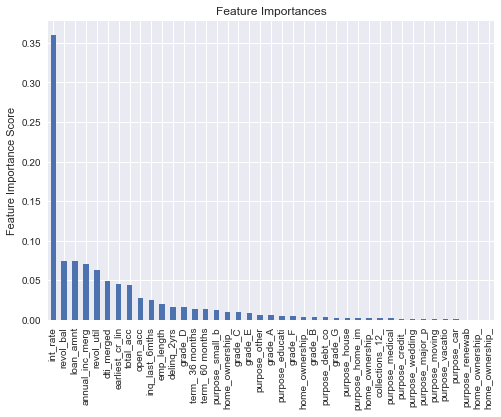

In [17]:
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1800, min_samples_leaf=30, subsample=0.9, random_state=10, max_features=33,
warm_start=True)




modelfit(gbm_tuned_4, train_x, train_y, UnsortedNames, performCV=False)

In [5]:
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1800, min_samples_leaf=30, subsample=0.9, random_state=10, max_features=33,
warm_start=True)


gbm_tuned_4.fit(train_x, train_y.ravel())


train_preds = gbm_tuned_4.predict(train_x)
dev_preds   = gbm_tuned_4.predict(test_x)
# rain_predprob = gbm_tuned_4.predict_proba(dtrain)[:,1]

# Analyze Tuned Model Performance in Testing and Development Datasets
(train_score, dev_score) = (accuracy_score(train_y, train_preds), accuracy_score(test_y, dev_preds))
    
# Find Recall and Precision Scores  
train_score_r = recall_score(train_y, train_preds, pos_label=1, average="binary")
train_score_p = precision_score(train_y, train_preds, pos_label=1, average="binary")
    
dev_score_r = recall_score(test_y, dev_preds, pos_label=1, average="binary")
dev_score_p = precision_score(test_y, dev_preds, pos_label=1, average="binary")
    
